In [33]:
import numpy as np

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score

In [34]:

df = pd.read_csv("rawdata_luftqualitaet.csv")

#luftqualitaet = df["state_air_quality"]
#0gut 1 neutral 2 schlecht
#skr.preprocessing.scale(luftqualitaet)
#skr.neural_network(luftqualitaet)
#skr.metrics.accuracy_score(df["state_air_quality"], df["state_air_quality"])

In [35]:
# --- A ---
#zeilen ^
#spalten <>
df.head()

,humidity_inside,temperature_inside,co2_inside,temperature_heater,temperature_wall_inside,state_air_quality
0,58.94,21.955,1653,41.187,14.062,1
1,58.97,21.940,1665,40.937,14.062,1
2,57.89,22.353,1707,40.375,14.250,1
3,58.96,22.504,1981,40.875,14.375,1
4,57.74,22.515,1868,40.812,14.375,1


<Axes: >

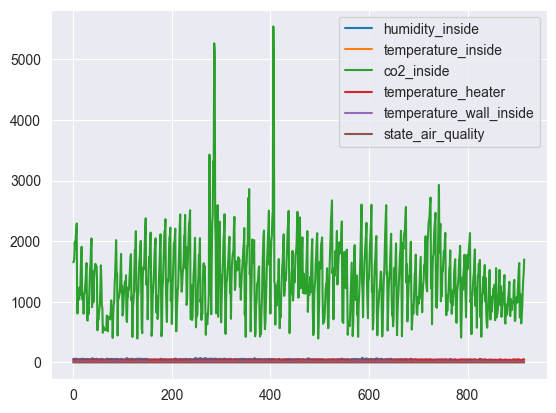

In [36]:
df.plot()

<Axes: >

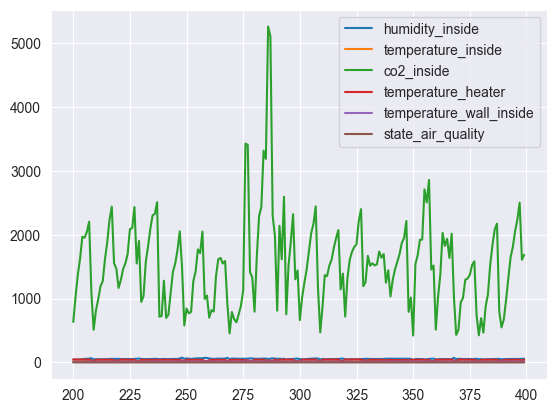

In [37]:

#ausschnitt
df.iloc[200:400].plot()

<Axes: >

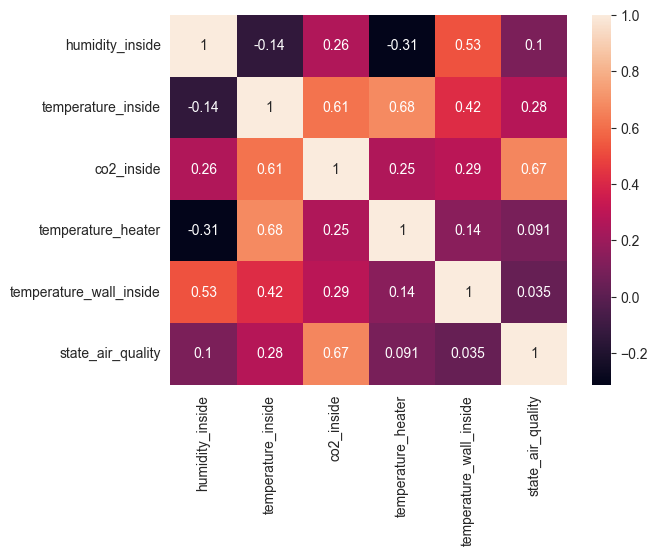

In [38]:
#heatmap
sns.heatmap(df.corr(),annot=True)

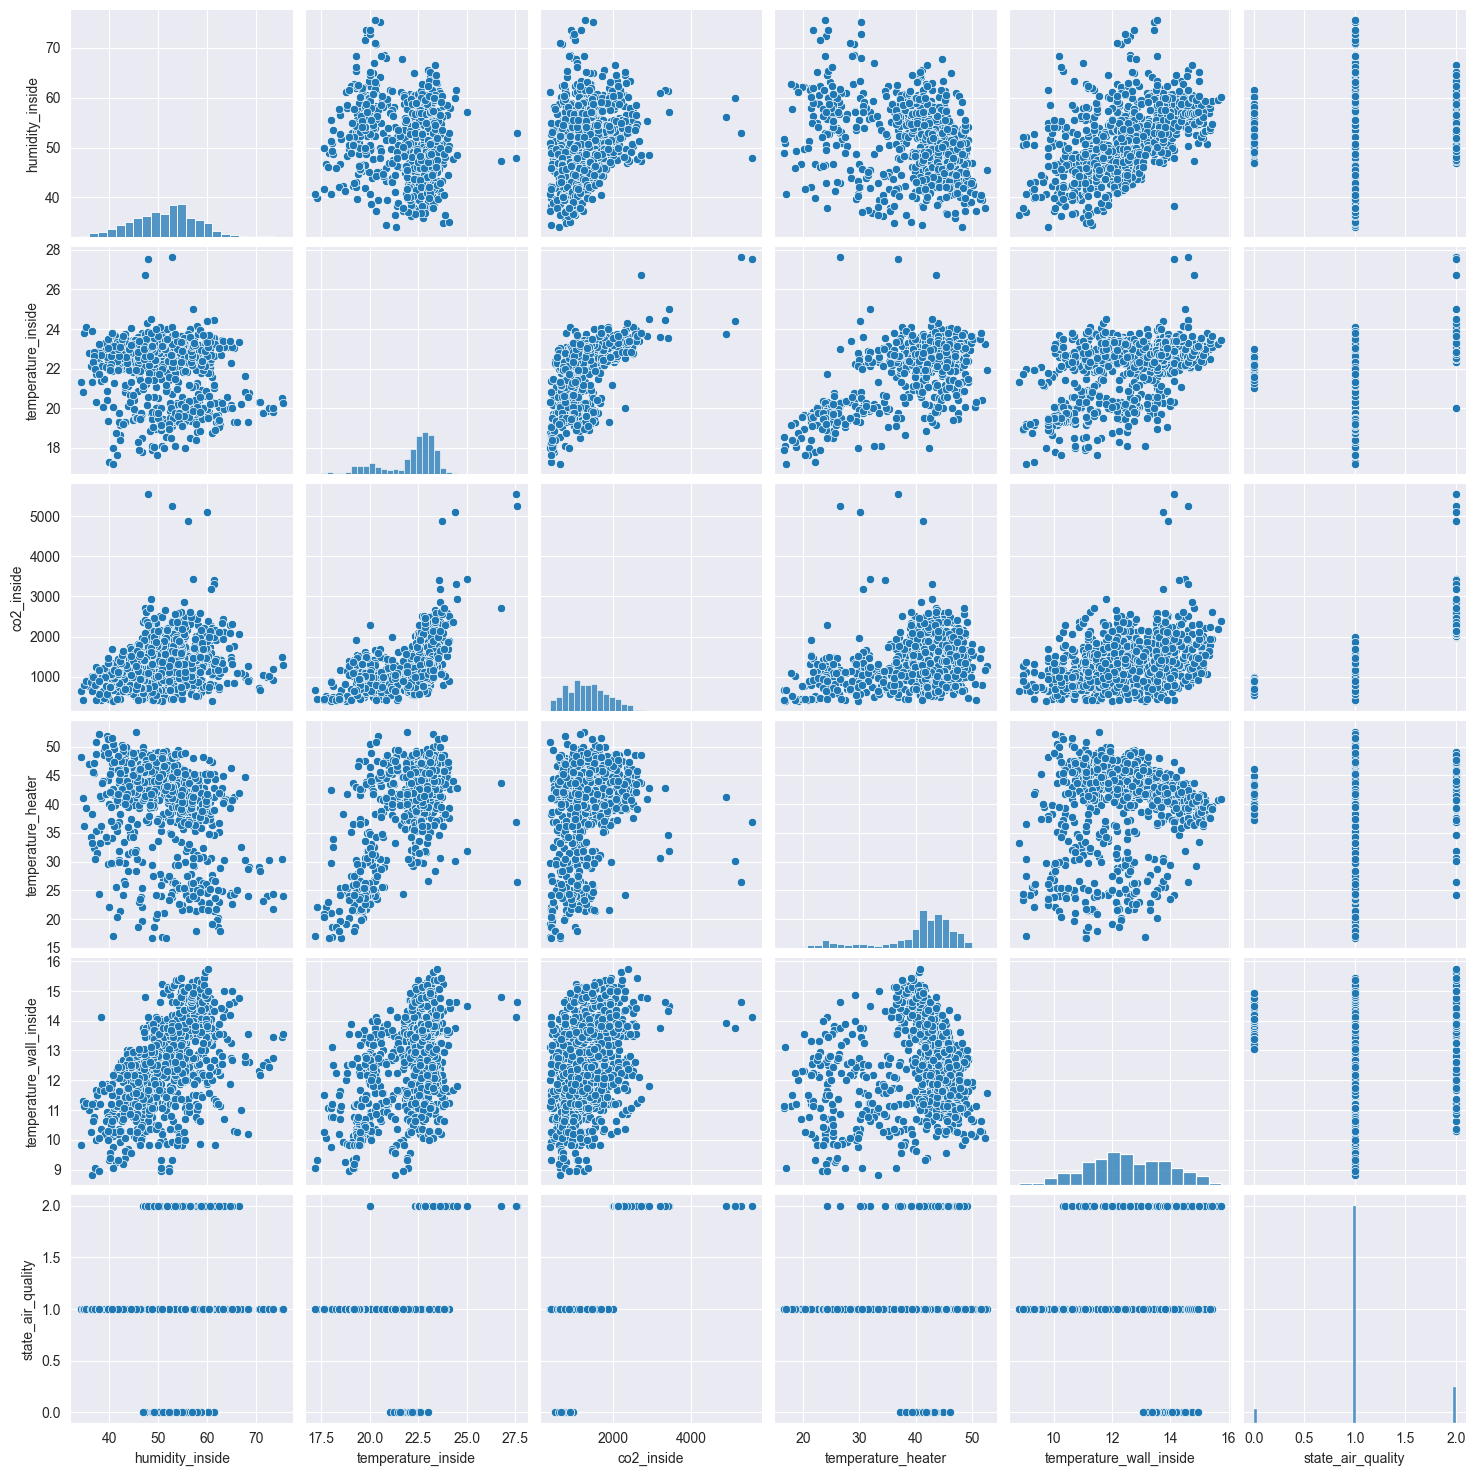

In [39]:
sns.pairplot(df)

In [40]:
df.count()

humidity_inside            916
temperature_inside         916
co2_inside                 916
temperature_heater         916
temperature_wall_inside    916
state_air_quality          916
dtype: int64

In [41]:
df.describe()

,humidity_inside,temperature_inside,co2_inside,temperature_heater,temperature_wall_inside,state_air_quality
count,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000
mean,51.598799,22.103834,1381.217249,40.034884,12.482422,1.085153
std,6.706102,1.457741,588.854522,7.383326,1.421408,0.422532
min,34.120000,17.194000,395.000000,16.687000,8.812000,0.000000
25%,46.967500,21.577750,978.000000,38.234250,11.500000,1.000000
50%,52.110000,22.589500,1328.500000,42.000000,12.437000,1.000000
75%,55.737500,23.089000,1716.000000,44.812000,13.625000,1.000000
max,75.510000,27.613000,5544.000000,52.625000,15.750000,2.000000


In [42]:
# --- 2 ---
X = df.drop(columns=["state_air_quality"])
air_quality = df["state_air_quality"]
x_train,x_test,y_train,y_test = train_test_split(X,air_quality,test_size=0.2,random_state=42,shuffle=True)

In [43]:
print(x_test.shape)
print(y_test.shape)

(184, 5)
(184,)


In [44]:
from sklearn import preprocessing

# --- C ---
scaler = preprocessing.MinMaxScaler()
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)
print("x_train_minmax",x_train_scaled.min(),x_train_scaled.max())
print("x_test_minmax",x_test_scaled.min(),x_test_scaled.max())

x_train_minmax 0.0 1.0
x_test_minmax 0.0 1.009299622202848


<Axes: ylabel='Count'>

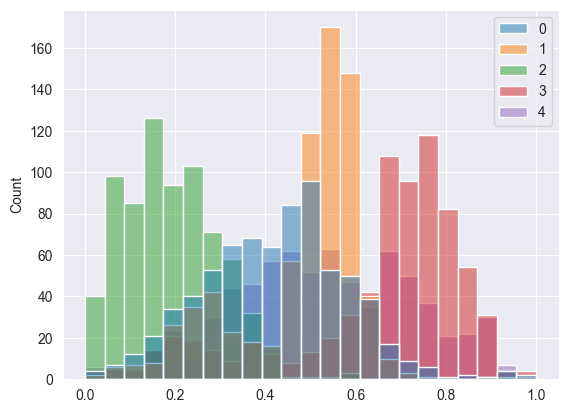

In [45]:
#überprüfen:

#ns.boxplot(data=pd.DataFrame(x_train_scaled))
sns.histplot(pd.DataFrame(x_train_scaled))

#df.DataFrame(x_train_scaled).describe()

In [46]:
# --- D ---
#training arc
clf = MLPClassifier(max_iter=300,alpha=1e-4,hidden_layer_sizes=(100,100,100),random_state=42,solver="adam", activation="relu")
clf.fit(x_train_scaled, y_train)


,hidden_layer_sizes,"(100, ...)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,300
,shuffle,True
,random_state,42


Mehr Iterationen erlauben

clf = MLPClassifier(max_iter=500)

Größe des Netzes ändern

clf = MLPClassifier(hidden_layer_sizes=(50, 20))

Solver oder Aktivierung anpassen

clf = MLPClassifier(solver="adam", activation="relu")

In [47]:
# --- C ---
prediction = clf.predict(x_test_scaled)
comparison = prediction == y_test
print(comparison)


380    True
879    True
355    True
357    True
362    True
       ... 
889    True
583    True
876    True
710    True
793    True
Name: state_air_quality, Length: 184, dtype: bool


In [48]:
# Accuracy richtig
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, prediction)
print(acc)           # zwischen 0 und 1
print(acc * 100)     # in Prozent

1.0
100.0
